# Iterative methods for solving Ax=b

In [41]:
import numpy as np
import timeit

In [182]:
A = np.array([[10,3],[1,20]])
b = np.array([80,100])

In [5]:
np.linalg.solve(A,b)

array([ 6.59898477,  4.67005076])

In [14]:
def Jacobi(A,b):
    n = A.shape[0]
    d = np.diag(A) #take the diagonals of A
    x = np.zeros(n)
    r = b - np.dot(A,x)
    while np.linalg.norm(r) > 10**-5:
        x = x + r/d
        r = b - np.dot(A, x)
    return x

In [15]:
Jacobi(A,b)

array([ 6.59898444,  4.67005053])

## Steepest gradient descent

In [317]:
# steepest graident descent for solving Ax=b, A is Positive definite
def SteepGD(A, b, x0, K):
    n = len(x0)
    x = x0 #initial vallue
    store_x = np.zeros([K,n])
    for i in range(K):
        r = b - np.dot(A,x) #compute residual
        t = np.inner(r,r)/np.inner(np.dot(A,r),r)
        x = x + t*r #update
        store_x[i,:] = x
    return store_x

In [321]:
A = np.array([[3.0,2],[2,6]])
b = np.array([2.0, -8])
x0 = np.array([-2.0,-2])
allx = SteepGD(A,b,x0,10)

In [138]:
print allx

[[ 0.08       -0.61333333]
 [ 1.00444444 -2.        ]
 [ 1.52213333 -1.65487407]
 [ 1.75221728 -2.        ]
 [ 1.8810643  -1.91410199]
 [ 1.93832964 -2.        ]
 [ 1.97039822 -1.97862094]
 [ 1.98465093 -2.        ]
 [ 1.99263245 -1.99467899]
 [ 1.99617979 -2.        ]]


Draw ellipse

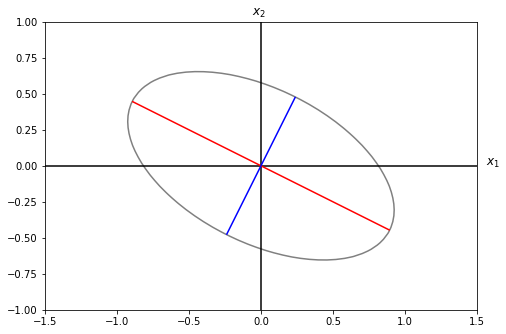

In [360]:
xlist = np.linspace(-1.5, 1.5)
ylist = np.linspace(-1.0, 1.0)
X, Y = np.meshgrid(xlist, ylist)
Z = 1.5*X**2 + 3*Y**2 + 2*X*Y 
v = np.array([1])
import matplotlib.pyplot as plt
fig=plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_aspect(1)  #set the plots aspect ratio to be 1. Default is not
cp = plt.contour(X, Y, Z, v, colors='gray', linestyles = 'solid')
plt.plot(xlist, 0*xlist, 'k') #draw x-axis
plt.plot(0*ylist, ylist, 'k') #draw y-axis
#plt.scatter(-2,-2, c='k')
plt.figtext(1.02,0.5, r"$x_1$", size ='large')
plt.figtext(0.48,1.02, r"$x_2$", size ='large')
a = -0.89
b = a/-2.
plt.plot([a,-a], [b, -b],'r') #draw major/minor axis
a2 = 0.237
b2 = 2*a2
plt.plot([a2,-a2], [b2, -b2],'b') #draw major/minor axis
plt.show()
#fig.savefig("./fig/ellipse.pdf", bbox_inches='tight')

Plot contour maps 

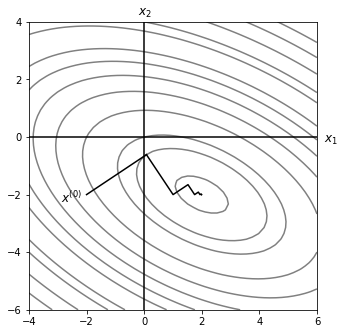

In [163]:
xlist = np.linspace(-4.0, 6.0)
ylist = np.linspace(-6.0, 4.0)
X, Y = np.meshgrid(xlist, ylist)
Z = 1.5*X**2 + 3*Y**2 + 2*X*Y -2*X + 8*Y
v = np.array([-9, -4, 0, 10, 20, 30, 40, 50, 70, 80, 100, 120, 140])
import matplotlib.pyplot as plt
fig=plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_aspect(1)  #set the plots aspect ratio to be 1. Default is not
cp = plt.contour(X, Y, Z, v, colors='gray', linestyles = 'solid')
plt.plot(xlist, 0*xlist, 'k') #draw x-axis
plt.plot(0*ylist, ylist, 'k') #draw y-axis
#plt.scatter(-2,-2, c='k')
plt.figtext(0.24,0.37, r"$x^{(0)}$", size ='large')
plt.figtext(0.85,0.58, r"$x_1$", size ='large')
plt.figtext(0.42,1.02, r"$x_2$", size ='large')
plt.plot([-2,allx[0,0]], [-2, allx[0,1]],'k')
plt.plot(allx[:,0], allx[:,1], 'k')
plt.show()
#fig.savefig("./fig/steepds.pdf", bbox_inches='tight')

## Conjugate Gradient Descent

In [194]:
# Conjugate Gradient Descent for solving Ax=b, A is Positive definite
def CGD(A, b, x0, K):
    n = len(x0)
    x = x0 #initial vallue
    r = b - np.dot(A,x)  #initial residual
    p = np.copy(r) #first direction
    store_x = np.zeros([K,n]) 
    for i in range(K):
        z = np.dot(A,p)  #compute Ap
        #t=1
        t = np.inner(p,r)/np.inner(p,z)  #compute stepsize
        x = x + t*p #update along direction p
        store_x[i,:] = x
        r = r - t*z #update residual
        b = -np.inner(r,z)/np.inner(p,z)
        p = r + b*p  #pick the next direction
    return store_x  #kth row stores kth x

In [322]:
print A
print b
print x0

[[ 3.  2.]
 [ 2.  6.]]
[ 2. -8.]
[-2. -2.]


In [323]:
x_cg = CGD(A,b,x0,2)
print x_cg

[[ 0.08       -0.61333333]
 [ 2.         -2.        ]]


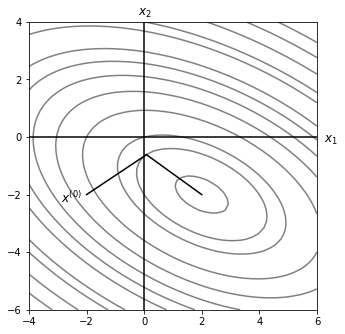

In [166]:
xlist = np.linspace(-4.0, 6.0)
ylist = np.linspace(-6.0, 4.0)
X, Y = np.meshgrid(xlist, ylist)
Z = 1.5*X**2 + 3*Y**2 + 2*X*Y -2*X + 8*Y
v = np.array([-9, -4, 0, 10, 20, 30, 40, 50, 70, 80, 100, 120, 140])
import matplotlib.pyplot as plt
fig=plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_aspect(1)  #set the plots aspect ratio to be 1. Default is not
cp = plt.contour(X, Y, Z, v, colors='gray', linestyles = 'solid')
plt.plot(xlist, 0*xlist, 'k') #draw x-axis
plt.plot(0*ylist, ylist, 'k') #draw y-axis
#plt.scatter(-2,-2, c='k')
plt.figtext(0.24,0.37, r"$x^{(0)}$", size ='large')
plt.figtext(0.85,0.58, r"$x_1$", size ='large')
plt.figtext(0.42,1.02, r"$x_2$", size ='large')
plt.plot([-2,x_cg[0,0]], [-2, x_cg[0,1]],'k')
plt.plot(x_cg[:,0], x_cg[:,1], 'k')
plt.show()
#fig.savefig("./fig/cgd.pdf", bbox_inches='tight')

## Numerical results comparison

Construct a large system $Ax=b$. $A$ is positive definite.

In [283]:
def CnstrPD(n, a):
    RM = np.random.randn(n,n) 
    q,r = np.linalg.qr(RM)
    z = (np.random.rand(n)+a)
    A = q.dot(np.diag(z)).dot(q.T)
    return A

In [324]:
start = timeit.default_timer()
A3 = CnstrPD(1000, 0.2)
end = timeit.default_timer()
et = end - start
print et

0.345520973206


In [325]:
print A3[:4,:4]

[[ 0.68613206 -0.01190967 -0.01140057 -0.0093074 ]
 [-0.01190967  0.70319939 -0.0121071   0.00162318]
 [-0.01140057 -0.0121071   0.69385697  0.0025794 ]
 [-0.0093074   0.00162318  0.0025794   0.67975042]]


In [292]:
start = timeit.default_timer()
A4 = CnstrPD(10000,0.2)
end = timeit.default_timer()
et = end - start
print et

158.536947012


In [333]:
print A4[:4,:4]

[[ 0.70364222 -0.00339084 -0.00504172  0.00361733]
 [-0.00339084  0.70186144 -0.004152    0.00071955]
 [-0.00504172 -0.004152    0.70046639  0.00159493]
 [ 0.00361733  0.00071955  0.00159493  0.70061931]]


In [221]:
b3 = np.random.randn(1000)

In [243]:
b4 = np.random.randn(10000)

In [169]:
A5 = np.copy(A)

In [186]:
b5 = np.random.randn(n)

**Gauss Elimination**

In [331]:
start = timeit.default_timer()
x_gauss = np.linalg.solve(A3, b3)
end = timeit.default_timer()
et = end - start
print "For 1000 by 1000, time is", et, "seconds"
print "First 10 entries of solution is", x_gauss[:9]

For 1000 by 1000, time is 0.0374779701233 seconds
First 10 entries of solution is [ 0.80061876 -2.12843916  0.20467176  1.37019709  2.10830694 -5.35518352
  1.58663752 -0.91147429 -2.9936951 ]


In [334]:
start = timeit.default_timer()
x_gauss = np.linalg.solve(A4, b4)
end = timeit.default_timer()
et = end - start
print "For 10000 by 10000, time is", et, "seconds"
print "First 10 entries of solution is", x_gauss[:9]

For 10000 by 10000, time is 9.50431895256 seconds
First 10 entries of solution is [ 1.94644746  1.76698657  2.26210589  1.69436196 -3.00615219  1.06459753
 -2.99660327  0.63651489 -0.95193667]


**CGD**

In [213]:
# define a CGD that doesn't store
def CGD_x(A, b, x0, K):
    n = len(x0)
    x = x0 #initial vallue
    r = b - np.dot(A,x)  #initial residual
    p = np.copy(r) #first direction
    #store_x = np.zeros([K,n]) 
    for i in range(K):
        z = np.dot(A,p)  #compute Ap         2n^2
        t = np.inner(p,r)/np.inner(p,z)  #compute stepsize     2n
        x = x + t*p #update along direction p      2n
        #store_x[i,:] = x
        r = r - t*z #update residual           2n 
        b = -np.inner(r,z)/np.inner(p,z)     #2n
        p = r + b*p  #pick the next direction   #2n
    return x  #kth row stores kth x

In [332]:
start = timeit.default_timer()
x0 = np.zeros(1000)
x_cg = CGD(A3, b3, x0, 20)
end = timeit.default_timer()
et = end - start
print "For 1000 by 1000, time is", et, "seconds"
print "First 10 entries of solution is", x_cg[-1,:9]

For 1000 by 1000, time is 0.0221920013428 seconds
First 10 entries of solution is [ 0.80061879 -2.12843931  0.20467182  1.3701971   2.10830702 -5.35518346
  1.58663763 -0.91147424 -2.99369523]


In [336]:
start = timeit.default_timer()
x0 = np.zeros(10000)
x_cg = CGD(A4, b4, x0, 40)
end = timeit.default_timer()
et = end - start
print "time is", et, "seconds"
print "First 10 entries of solution is", x_cg[-1,:9]

time is 2.17681002617 seconds
First 10 entries of solution is [ 1.94644746  1.76698657  2.26210589  1.69436196 -3.00615219  1.06459753
 -2.99660327  0.63651489 -0.95193667]


## Kaczmarz

In [298]:
np.random.randint(7, size=20)

array([0, 3, 3, 0, 2, 3, 5, 5, 0, 2, 1, 2, 1, 3, 5, 6, 5, 0, 5, 5])

In [304]:
def Kaczmarz(A,b,x0,K):
    x = x0
    n = len(x)
    IND = np.random.randint(n, size = K*n)
    for i in IND:
        a = A[i,:]
        x = x + (b[i]- np.inner(a,x))/np.inner(a,a)*a
    return x

In [311]:
def KaczmarzC(A,b,x0,K):
    x = x0
    n = len(x)
    for i in range(n*K):
        ri = i % n
        a = A[ri,:]
        x = x + (b[ri]- np.inner(a,x))/np.inner(a,a)*a
    return x

In [307]:
start = timeit.default_timer()
x0 = np.zeros(1000)
x_k = Kaczmarz(A3, b3, x0, 50)
end = timeit.default_timer()
et = end - start
print "time is", et, "seconds"
print "First 10 entries of solution is", x_k[:9]

time is 0.313918828964 seconds
First 10 entries of solution is [-0.65146967 -2.95367795  1.42873181  0.90768087  1.18442026 -4.00339409
  1.06334861 -1.73996914 -1.49629443]


In [308]:
start = timeit.default_timer()
x0 = np.zeros(10000)
x_k = Kaczmarz(A4, b4, x0, 50)
end = timeit.default_timer()
et = end - start
print "time is", et, "seconds"
print "First 10 entries of solution is", x_k[:9]

time is 15.7085111141 seconds
First 10 entries of solution is [ 1.9222863   1.76108946  2.27039792  1.69531567 -3.01660671  1.07127798
 -2.97387825  0.61950044 -0.95485764]


In [315]:
start = timeit.default_timer()
x0 = np.zeros(10000)
x_k = KaczmarzC(A4, b4, x0, 30)
end = timeit.default_timer()
et = end - start
print "time is", et, "seconds"
print "First 10 entries of solution is", x_k[:9]

time is 8.33293008804 seconds
First 10 entries of solution is [ 1.93887111  1.76327746  2.26037084  1.69200438 -3.00889578  1.07640419
 -2.99098315  0.62967281 -0.96049048]
